In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("smart_class_energy_data.csv")
df.head()
df.describe()

,Num_Students,Outdoor_Temp,Humidity,Lights_On,Windows_Open,Fan_Speed,AC_Temp
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,49.218000,29.742121,61.601151,0.526000,0.490000,3.478000,22.984699
std,28.134491,5.708421,16.924468,0.499824,0.500401,1.201834,2.064986
min,5.000000,20.088729,30.145123,0.000000,0.000000,1.000000,20.006094
25%,25.000000,24.796337,47.449764,0.000000,0.000000,3.000000,21.298244
50%,46.000000,29.785890,62.974976,1.000000,0.000000,3.000000,22.656177
75%,74.000000,34.309672,75.977499,1.000000,1.000000,4.000000,24.200886
max,100.000000,39.930563,89.911184,1.000000,1.000000,5.000000,27.995065


In [3]:
df.dropna()

,Num_Students,Outdoor_Temp,Time_of_Day,Humidity,Lights_On,Windows_Open,Fan_Speed,AC_Temp
0,33,34.714868,Morning,69.221654,1,0,2,26.911474
1,73,27.689434,Evening,75.267053,1,1,4,22.531882
2,73,38.544262,Afternoon,69.683302,0,0,3,23.523407
3,7,33.203330,Evening,89.243701,1,0,4,22.411541
4,35,33.565462,Evening,68.174341,0,0,1,26.139862
...,...,...,...,...,...,...,...,...
495,31,35.311169,Evening,71.632427,1,1,3,23.411115
496,62,33.835296,Evening,77.747009,1,0,4,21.676222
497,47,26.515593,Afternoon,78.597107,0,1,4,20.370864
498,33,35.886481,Afternoon,59.353728,1,1,5,20.237912


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le = LabelEncoder()
df["Time_of_Day"] = le.fit_transform(df["Time_of_Day"])

In [6]:
correlation_matrix = df.corr()
print(correlation_matrix)

              Num_Students  Outdoor_Temp  Time_of_Day  Humidity  Lights_On  \
Num_Students      1.000000     -0.069036     0.059211  0.082841  -0.014156   
Outdoor_Temp     -0.069036      1.000000    -0.047031 -0.047611  -0.082780   
Time_of_Day       0.059211     -0.047031     1.000000  0.076527  -0.048490   
Humidity          0.082841     -0.047611     0.076527  1.000000   0.071968   
Lights_On        -0.014156     -0.082780    -0.048490  0.071968   1.000000   
Windows_Open      0.038090     -0.090445     0.027964 -0.010494  -0.022996   
Fan_Speed         0.387247      0.166994     0.070672  0.320569   0.004290   
AC_Temp          -0.409075     -0.181758    -0.032646 -0.329279  -0.022950   

              Windows_Open  Fan_Speed   AC_Temp  
Num_Students      0.038090   0.387247 -0.409075  
Outdoor_Temp     -0.090445   0.166994 -0.181758  
Time_of_Day       0.027964   0.070672 -0.032646  
Humidity         -0.010494   0.320569 -0.329279  
Lights_On        -0.022996   0.004290 -0.022950

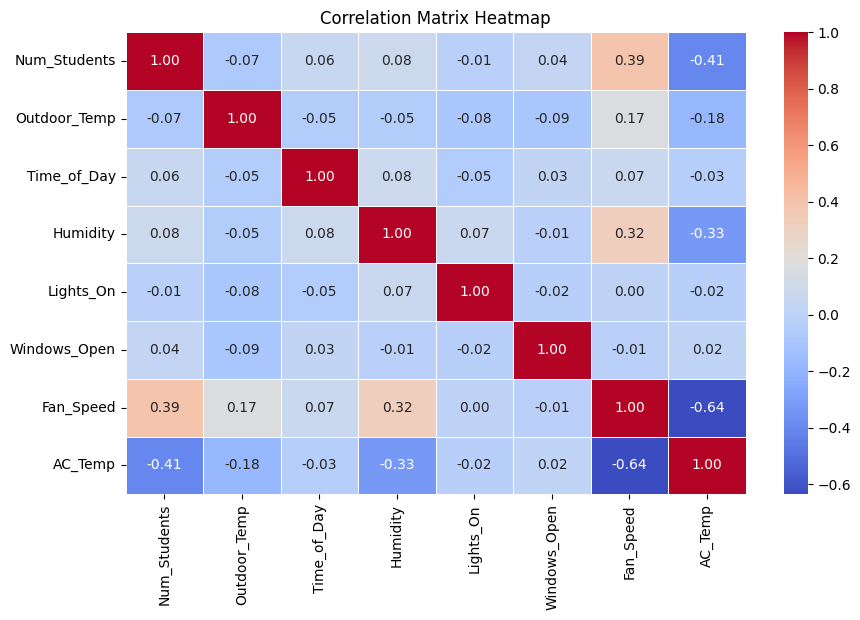

In [8]:
plt.figure(figsize=(10,6))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [10]:
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

df_cleaned = remove_outliers_iqr(df)

In [11]:
correlation_matrix = df_cleaned.corr()

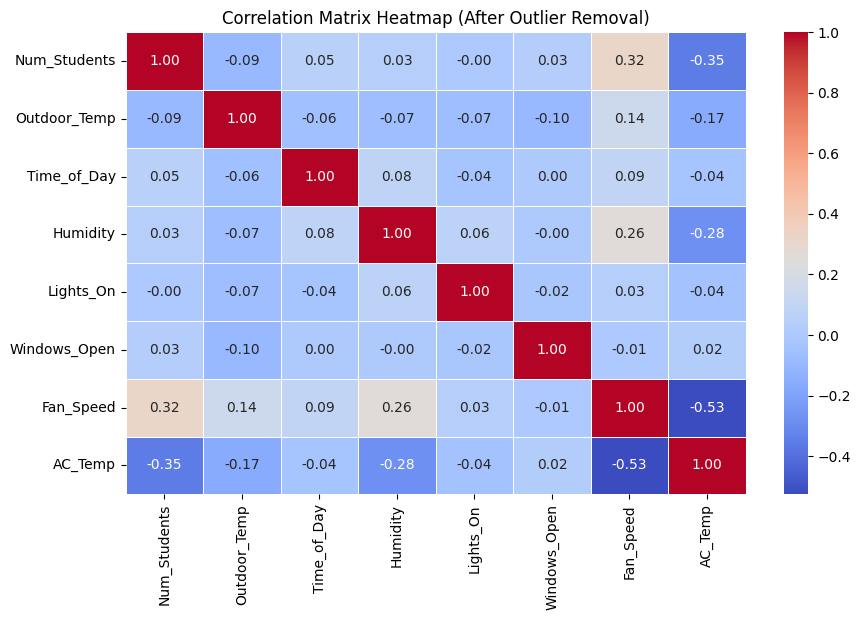

In [12]:
plt.figure(figsize=(10,6))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (After Outlier Removal)")
plt.show()

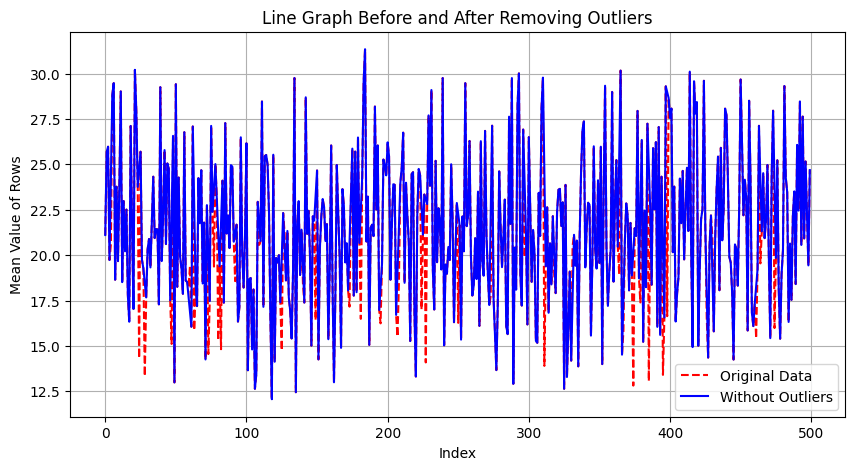

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df.mean(axis=1), label="Original Data", linestyle='dashed', color='red')

# Plot the cleaned data (without outliers)
plt.plot(df_cleaned.index, df_cleaned.mean(axis=1), label="Without Outliers", color='blue')
# Labels and title
plt.xlabel("Index")
plt.ylabel("Mean Value of Rows")
plt.title("Line Graph Before and After Removing Outliers")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [14]:
x=df.drop(columns=['AC_Temp'])

In [15]:
y=df['AC_Temp']

In [16]:
x

,Num_Students,Outdoor_Temp,Time_of_Day,Humidity,Lights_On,Windows_Open,Fan_Speed
0,33,34.714868,2,69.221654,1,0,2
1,73,27.689434,1,75.267053,1,1,4
2,73,38.544262,0,69.683302,0,0,3
3,7,33.203330,1,89.243701,1,0,4
4,35,33.565462,1,68.174341,0,0,1
...,...,...,...,...,...,...,...
495,31,35.311169,1,71.632427,1,1,3
496,62,33.835296,1,77.747009,1,0,4
497,47,26.515593,0,78.597107,0,1,4
498,33,35.886481,0,59.353728,1,1,5


In [17]:
y

0      26.911474
1      22.531882
2      23.523407
3      22.411541
4      26.139862
         ...    
495    23.411115
496    21.676222
497    20.370864
498    20.237912
499    21.762938
Name: AC_Temp, Length: 500, dtype: float64

In [18]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=20,random_state=40)

In [19]:
model=LinearRegression()

In [20]:
model.fit(x_train, y_train)

LinearRegression()

In [21]:
y_pred=model.predict(x_test)

In [22]:
mse=mean_squared_error(y_test,y_pred)

In [23]:
print(mse)

1.9205853624119698


In [24]:
r2=r2_score(y_test,y_pred)

In [25]:
new_sample = np.array([[55,32.145236,2,85.456921,0,1,3]])  # Replace with actual values

# Step 2: Ensure the input has the correct shape
new_sample = new_sample.reshape(1, -1)  # Reshape for a single sample

# Step 3: Predict output using the trained model
prediction = model.predict(new_sample)

# Step 4: Display Prediction
print(f"Predicted Output: {prediction[0]}")

Predicted Output: 22.84685219734036


C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
